# Notebook to find avg. temp for a location

by Cascade Tuholske 2020.04.06

In [1]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [2]:
#### Heat Index Data 
DATA_IN = '/home/cascade/projects/UrbanHeat/data/interim/ERA5_HI/' # output from avg temp
FIG_OUT = '/home/cascade/projects/UrbanHeat/figures/'
fn_list = sorted(glob.glob(DATA_IN+'*.csv'))

In [3]:
fn_list = sorted(glob.glob(DATA_IN+'*.csv'))
df_out = pd.DataFrame()

In [4]:
#### Pick a city of geography & Year ... 1987-1988 W Africa, 1998 India & 2003 Europe
# Cities : 12080 Hongcong, 9691 Kolkata, 8050 Bangalore, 1910 Accra, 2484 Lagos, 2046 Paris, 2987 Rome,
# 2559 Milan, 1887 bordeaux, 2135 Brussels
location = tuple(('Accra', 1910))
geog = 'ID_HDC_G0' # geography
year = '1988' # year we want to plot
days = 366+1 # leap year or not (always plus one), all data will have a Feb 29 in it with current setup as nulls

FN_OUT = 'FIG4-'+location[0]

# Labels
hi_label = year+' max HI'
labels = [hi_label, 'mean max HI', '40.6 C']

In [5]:
 # get leap year cols from 2016
hi16 = pd.read_csv(fn_list[33]) 
cols = list(hi16.iloc[:,3:].columns)
cols = [year[5:] for year in cols]

In [6]:
cols = list(hi16.iloc[:,3:].columns)
cols = [year[5:] for year in cols]

In [7]:
temp_list = []
for i, fn in enumerate(fn_list):
    df = pd.read_csv(fn) # open data frame
    year_label = [(df.columns[3]).split('.')[0]] # get year
    row = df[df[geog] == location[1]]
    temp = row.iloc[:,3:] # get only temp columns
        
    # add in col for leap years
    if temp.shape[1] == 365:
        leap = year_label[0]+'.02.29'
        temp.insert(loc = 59, column = '2015.02.29', value = np.nan, allow_duplicates=False)

    # Set Index & Columns
    temp.index = year_label
    temp.columns = cols # revalue to m.d
    
    # add to list
    temp_list.append(temp)
    #df.append(temp, sort = False)

In [8]:
df_out = pd.concat(temp_list)

# Lets Plot

In [9]:
means = df_out.mean(axis = 0)
dates = list(range(1,days))

In [10]:
len(dates)

366

Text(0.5, 1.0, '1988 HI Max vs. 34-average HI, Accra')

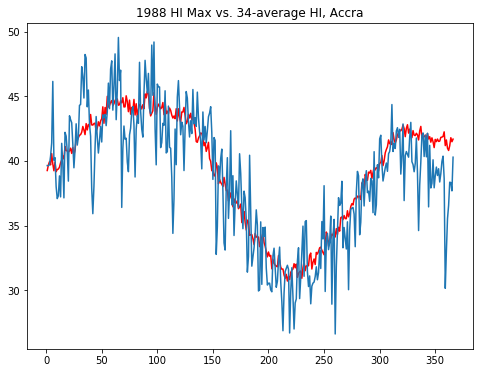

In [11]:
#### Make Figure & Save it

# Set up
rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 
fig, axs = plt.subplots(1, 1, figsize = (8, 6), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

# Plot
plt.plot(dates, means, color = 'red')
plt.plot(dates, df_out.loc[year])
plt.title(year+' HI Max vs. 34-average HI, '+ location[0])

# Let's plot summer

In [12]:
#### days of year
jan = 31
feb = 28 #29
march = 31
start = jan + feb + march
end = 365 - 31 - 30 - 30 # Oct, Nov, Dec
data = df_out.iloc[:,start+1:end]

In [13]:
cols = data.columns
cols = pd.to_datetime([year+'.'+data for data in cols])

In [14]:
means = data.mean(axis = 0)

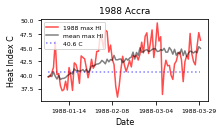

In [33]:
#### Make Figure & Save it

# Set up
rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 
fig, axs = plt.subplots(1, 1, figsize = (3, 2), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

# Plot
plt.plot(cols, data.loc[year], color = 'red', alpha = 0.7) # Daily HI Max
plt.plot(cols, means, color = 'black', alpha = 0.5, linestyle = 'solid') # Long term daily avg
plt.title(year+' '+ location[0], fontsize = 9)
plt.ylabel('Heat Index C', fontsize = 8)
plt.xlabel('Date', fontsize = 8)
plt.hlines(y = 40.6, xmin = cols[0], xmax = cols[-1], alpha = 0.5, linestyle = ':', color = 'blue')

# Ticks
axs.tick_params(axis='both', labelsize = 6)

# Legend
plt.legend(labels, loc=2, prop={'size': 6})
axs.xaxis.set_major_locator(plt.MaxNLocator(4))
fig.set_size_inches(3, 1.5)
# Save it out
plt.savefig(FIG_OUT+'TEST.png', dpi = 300, bbox_inches='tight')

# daily heat index vs. 34-year daily average,

# Season for Africa 

In [16]:
#### days of year
jan = 31
feb = 28 #29
march = 31
start = 0
end = jan + feb + march # Oct, Nov, Dec
data = df_out.iloc[:,start+1:end]

In [17]:
cols = data.columns
cols = pd.to_datetime([year+'.'+data for data in cols])

In [18]:
means = data.mean(axis = 0)

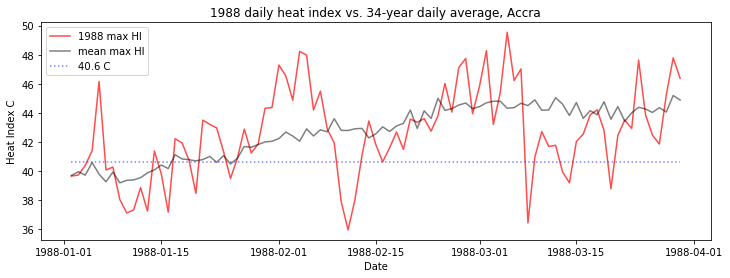

In [19]:
#### Make Figure & Save it

# Set up
rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 
fig, axs = plt.subplots(1, 1, figsize = (12, 4), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

# Plot
plt.plot(cols, data.loc[year], color = 'red', alpha = 0.7) # Daily HI Max
plt.plot(cols, means, color = 'black', alpha = 0.5, linestyle = 'solid') # Long term daily avg
plt.title(year+' daily heat index vs. 34-year daily average, '+ location[0])
plt.ylabel('Heat Index C')
plt.xlabel('Date')
plt.hlines(y = 40.6, xmin = cols[0], xmax = cols[-1], alpha = 0.5, linestyle = ':', color = 'blue')

# Legend
plt.legend(labels)
# Save it out
#plt.savefig(FIG_OUT+FN_OUT, dpi = 300, bbox_inches='tight')

